## Compressione mediante PCA

Il notebook utilizza la PCA (Principal Component Analysis) per comprimere un'immagine e analizzare la perdita di informazioni derivante dalla riduzione della dimensionalità. 

La PCA è una tecnica di riduzione della dimensionalità che proietta i dati in uno spazio generato da un numero ridotto di componenti principali, preservando il più possibile la varianza originale. Questo processo può essere utile per comprimere immagini, riducendo la quantità di dati necessari per rappresentarle, pur mantenendo una qualità accettabile.

Il primo passo consiste nel caricare un'immagine e convertirla in scala di grigi, calcolando la media dei canali di colore. Successivamente, viene calcolata la matrice di covarianza dell'immagine centrata, da cui si estraggono gli autovalori e gli autovettori. Gli autovalori rappresentano la quantità di varianza spiegata da ciascuna componente principale, mentre gli autovettori definiscono le direzioni di queste componenti nello spazio dei dati.

La funzione `pca` proietta l'immagine nello spazio generato dai primi autovettori selezionati e la ricostruisce nello spazio originale. Questo processo consente di osservare come la qualità della ricostruzione varia al variare del numero di componenti principali utilizzati. Le immagini ricostruite vengono visualizzate in una griglia, con un titolo che indica il numero di componenti principali utilizzati per ciascuna ricostruzione.

Per analizzare quantitativamente la perdita di informazioni, viene calcolata la norma di Frobenius, che misura la distanza tra l'immagine originale e quella ricostruita. Questa distanza viene tracciata in un grafico per mostrare come l'errore di ricostruzione diminuisce all'aumentare del numero di componenti principali. Infine, il notebook visualizza l'immagine originale e quella ricostruita utilizzando tutte le componenti principali, per confrontare visivamente i risultati.

Più in dettaglio, i passaggi principali sono:

1. **Caricamento e pre-elaborazione dell'immagine:**
   - L'immagine viene caricata e convertita in scala di grigi calcolando la media dei canali di colore.

2. **Calcolo degli autovalori e autovettori:**
   - La funzione `get_eigen` calcola gli autovalori e autovettori della matrice di covarianza dell'immagine centrata.

3. **Compressione tramite PCA:**
   - La funzione `pca` proietta l'immagine nello spazio generato dai primi autovettori e la ricostruisce nello spazio originale.

4. **Visualizzazione dei risultati:**
   - Vengono mostrati:
     - Gli autovalori ordinati.
     - Le immagini ricostruite utilizzando un numero crescente di componenti principali.
     - La differenza tra l'immagine originale e quelle compresse, misurata con la norma di Frobenius.


Operazioni preliminari

- **Disattivare i warning**: Per rendere l'output del notebook più pulito e leggibile.
- **Visualizzare i grafici inline**: Per facilitare l'analisi dei risultati direttamente nel notebook, senza dover aprire finestre esterne.

1. **`import warnings`**:
   - Importa il modulo `warnings`, che consente di gestire i messaggi di avviso (warnings) generati dal codice Python.

2. **`warnings.filterwarnings('ignore')`**:
   - Disattiva tutti i messaggi di avviso. Questo è utile per evitare che i warning "inquinino" l'output del notebook, specialmente quando non sono rilevanti per l'analisi o la visualizzazione.

3. **`%matplotlib inline`**:
   - È una *magic command* specifica di Jupyter Notebook.
   - Serve per visualizzare i grafici generati da `matplotlib` direttamente all'interno del notebook, invece di aprirli in una finestra separata.


In [9]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Importazione delle librerie necessarie per:
- Visualizzare immagini e grafici.
- Eseguire operazioni algebriche lineari (es. calcolo di autovalori e autovettori).
- Manipolare array numerici.

Queste importazioni sono fondamentali per implementare la PCA e visualizzare i risultati nel notebook.

1. **Importazioni da `pylab`:**
   - `subplot`: Permette di creare più grafici in un'unica figura.
   - `imshow`: Visualizza immagini bidimensionali.
   - `title`: Aggiunge un titolo ai grafici.
   - `gray`: Imposta la mappa dei colori in scala di grigi.
   - `NullLocator`: Rimuove i tick (etichette) dagli assi.

2. **Importazioni da `numpy`:**
   - `linalg`: Modulo per operazioni algebriche lineari, come il calcolo di autovalori e autovettori.
   - `np`: Alias comune per il modulo `numpy`, utilizzato per operazioni numeriche.


In [4]:
from pylab import subplot,imshow,title,gray,NullLocator
from numpy import linalg
import numpy as np

##### **Definizione stile per grafica**
- **Uniformità visiva:** Configura uno stile coerente per tutti i grafici generati nel notebook.
- **Personalizzazione:** Permette di utilizzare una palette di colori personalizzata e una colormap specifica per migliorare la leggibilità e l'estetica delle visualizzazioni.
- **Facilità di interpretazione:** Le impostazioni predefinite (come il font e le dimensioni delle figure) rendono i grafici più chiari e leggibili.

1. **Importazioni:**
   - `matplotlib.pyplot` (`plt`): Modulo per creare grafici e visualizzazioni.
   - `matplotlib.colors` (`mcolors`): Modulo per gestire colori e creare colormap personalizzate.

2. **Impostazione dello stile di plotting:**
   - `plt.style.use('fivethirtyeight')`: Imposta lo stile dei grafici al tema "fivethirtyeight", che offre un design moderno e leggibile.

3. **Configurazione dei parametri di visualizzazione:**
   - `plt.rcParams`: Dizionario che consente di configurare vari aspetti dei grafici, come:
     - **Font e dimensioni:** Specifica il tipo di carattere (`sans-serif`, `Ubuntu`) e le dimensioni per titoli, etichette e legende.
     - **Colori e interpolazione:** Imposta la mappa dei colori predefinita (`jet`) e disabilita l'interpolazione delle immagini (`none`).
     - **Dimensioni delle figure:** Imposta la dimensione predefinita delle figure a `(16, 8)`.
     - **Linee e marker:** Configura lo spessore delle linee e la dimensione dei marker.

4. **Definizione di una palette di colori personalizzata:**
   - `colors`: Lista di colori esadecimali che possono essere utilizzati per personalizzare i grafici.

5. **Creazione di una colormap personalizzata:**
   - `mcolors.LinearSegmentedColormap.from_list`: Crea una colormap lineare utilizzando un sottoinsieme dei colori definiti nella lista `colors`.

In [5]:
# Import matplotlib for plotting and color utilities
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the plotting style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Configure various font and figure parameters for consistent styling
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

# Define a list of custom colors for plotting
colors = [
    '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
    '#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', 
    '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', 
    '#3b638c', '#af6f09'
]

# Create a custom colormap using a subset of the defined colors
cmap = mcolors.LinearSegmentedColormap.from_list(
    "", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]]
)

Funzione che proietta i vettori in $M$ nello spazio generato dai primi numpc autovettori da vec. La funzione prende in ingresso una matrice di dati centrati `M` (dove ogni riga rappresenta un campione e ogni colonna una caratteristica), una matrice di autovettori `vec` (tipicamente ottenuti dalla decomposizione della matrice di covarianza dei dati), e un parametro opzionale `numpc` che indica quante componenti principali utilizzare per la proiezione.

All'interno della funzione, vengono selezionati i primi `numpc` autovettori dalle colonne di `vec` per formare la base dello spazio ridotto. Questo viene fatto tramite l’indicizzazione delle colonne: `vec[:, range(numpc)]`. Successivamente, i dati centrati vengono proiettati su questo nuovo spazio tramite il prodotto scalare (`np.dot(M, basis)`), ottenendo così le coordinate dei dati nelle nuove componenti principali. Infine, la funzione restituisce sia la base dello spazio ridotto (gli autovettori selezionati) sia le proiezioni dei dati su questa base.

Un aspetto importante da notare è che il parametro `numpc` deve essere scelto con attenzione: se è troppo basso si rischia di perdere informazione significativa, se è troppo alto si riduce il beneficio della riduzione di dimensionalità. Inoltre, la funzione presume che i dati siano già centrati (media zero per ogni colonna), condizione essenziale per una PCA corretta.

In [11]:
def pca(M, vec, numpc=0):
    """
    Proietta i vettori in M nello spazio generato dai primi 'numpc' autovettori di 'vec'.

    Parametri
    ----------
    M : ndarray
        Matrice dei dati centrati (ogni riga è un campione, ogni colonna una feature).
    vec : ndarray
        Matrice degli autovettori (ogni colonna è un autovettore).
    numpc : int, opzionale
        Numero di componenti principali da utilizzare per la proiezione (default: 0).

    Restituisce
    ----------
    basis : ndarray
        Matrice degli autovettori selezionati (base dello spazio ridotto).
    projections : ndarray
        Proiezione dei dati nello spazio delle componenti principali selezionate.
    """
    # Estrae i primi 'numpc' autovettori come base dello spazio ridotto
    basis = vec[:, range(numpc)]
    # Proietta i dati centrati nello spazio delle componenti principali
    projections = np.dot(M, basis)
    # Restituisce la base e le proiezioni
    return basis, projections

Calcolo di autovalori e autovettori della matrice di covarianza associata alle righe di $A$

La funzione `get_eigen` è utilizzata per preparare i dati per la PCA, calcolando gli **autovalori** e gli **autovettori** della matrice di covarianza associata alle righe della matrice di input `A`. Gli autovalori e gli autovettori calcolati possono essere utilizzati per:
- **Ridurre la dimensionalità dei dati:** Proiettandoli nello spazio generato dai primi autovettori.
- **Analizzare la varianza spiegata:** Determinando quanta varianza è spiegata da ciascuna componente principale.
- **Visualizzare i dati:** In uno spazio a dimensioni ridotte.


##### **Passaggi principali della funzione**

1. **Calcolo della media per ogni colonna (feature):**
   ```python
   means = np.mean(A, axis=0)
   ```
   - Viene calcolata la media di ogni colonna della matrice `A`.
   - Questo passaggio è necessario per centrare i dati, ovvero per fare in modo che ogni feature abbia una media pari a zero.

2. **Sottrazione della media:**
   ```python
   M = (A - means)
   ```
   - La media calcolata viene sottratta da ogni elemento della matrice `A`.
   - Questo produce una nuova matrice `M` in cui ogni colonna ha una media pari a zero. Questo è un requisito per calcolare correttamente la matrice di covarianza.

3. **Calcolo della matrice di covarianza:**
   ```python
   c = np.cov(M, rowvar=0)
   ```
   - La matrice di covarianza `c` viene calcolata utilizzando la matrice centrata `M`.
   - La matrice di covarianza rappresenta la relazione lineare tra le diverse feature.

4. **Calcolo degli autovalori e autovettori:**
   ```python
   [evals, evects] = np.linalg.eig(c)
   ```
   - Gli **autovalori** (`evals`) rappresentano la varianza spiegata da ciascuna componente principale.
   - Gli **autovettori** (`evects`) rappresentano le direzioni delle componenti principali.

5. **Ordinamento degli autovalori e autovettori:**
   ```python
   idx = np.argsort(evals)
   idx = idx[::-1]
   evects = evects[:, idx]
   evals = evals[idx]
   ```
   - Gli autovalori vengono ordinati in ordine decrescente.
   - Gli autovettori vengono riordinati di conseguenza.
   - Questo assicura che le componenti principali siano ordinate in base alla quantità di varianza che spiegano.

6. **Restituzione dei risultati:**
   ```python
   return evals, evects, M
   ```
   - La funzione restituisce:
     - `evals`: Gli autovalori ordinati.
     - `evects`: Gli autovettori ordinati.
     - `M`: La matrice centrata.

In [ ]:
def get_eigen(A):
    """
    Calcola gli autovalori e autovettori della matrice di covarianza delle righe di A.

    Parametri
    ----------
    A : ndarray
        Matrice di input (ogni riga è un campione, ogni colonna una feature).

    Restituisce
    ----------
    evals : ndarray
        Autovalori ordinati in modo decrescente.
    evects : ndarray
        Autovettori ordinati secondo gli autovalori (ogni colonna è un autovettore).
    M : ndarray
        Matrice centrata (A meno la media di ogni colonna).
    """
    # calcola la media per ogni colonna (feature)
    means = np.mean(A, axis=0)
    # sottrae la media (lungo le colonne): ogni feature ora ha media zero
    M = (A - means)
    # calcola la matrice di covarianza delle righe di A
    c = np.cov(M, rowvar=0)
    # calcola autovalori e autovettori della matrice di covarianza
    [evals, evects] = np.linalg.eig(c)
    # ottiene gli indici degli autovalori ordinati in modo decrescente
    idx = np.argsort(evals)[::-1]
    # ordina gli autovettori (colonne di evects) secondo gli autovalori ordinati
    evects = evects[:, idx]
    # ordina gli autovalori in modo decrescente
    evals = evals[idx]
    return evals, evects, M

Il blocco di codice seguente esegue una serie di operazioni per preparare un'immagine all'analisi tramite PCA (Principal Component Analysis). La PCA viene applicata all'immagine in scala di grigi, trattando ogni riga come una variabile. 

1. **Caricamento dell'immagine:**  
   L'immagine viene caricata dal file `'austen.jpg'` utilizzando `plt.imread`. Questo comando restituisce un array NumPy che rappresenta l'immagine nei suoi canali di colore (tipicamente RGB).

2. **Conversione in scala di grigi:**  
   L'immagine a colori viene convertita in scala di grigi calcolando la media dei valori dei tre canali di colore per ogni pixel (`np.mean(img, 2)`). Il risultato è una matrice bidimensionale dove ogni valore rappresenta l'intensità di grigio di un pixel.

3. **Definizione del numero massimo di componenti principali:**  
   La variabile `full_pc` viene impostata uguale al numero di righe dell'immagine in scala di grigi (`bw.shape[0]`). Questo valore rappresenta il massimo numero di componenti principali che si possono estrarre tramite PCA, dato che il numero di componenti principali non può superare la dimensione minore della matrice dei dati.

4. **Calcolo degli autovalori, autovettori e matrice centrata:**  
   La funzione `get_eigen` viene invocata sulla matrice in scala di grigi. Questa funzione restituisce gli autovalori (`val`), gli autovettori (`vec`) e la matrice centrata (`bw_c`), che sono elementi fondamentali per la PCA.

5. **Visualizzazione della matrice centrata:**  
   Infine, la matrice centrata viene visualizzata come immagine in scala di grigi tramite la funzione `imshow`, disabilitando la griglia per una visualizzazione più pulita.



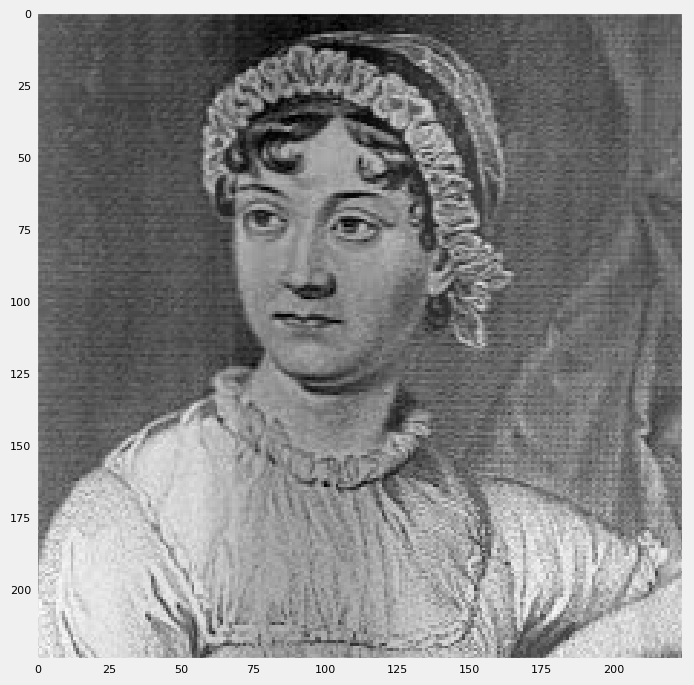

In [16]:
# Carica un'immagine dal file 'austen.jpg'
img = plt.imread('austen.jpg')

# Converte l'immagine in scala di grigi calcolando la media dei canali di colore
bw = np.mean(img, 2)

# Imposta il numero massimo di componenti principali (uguale al numero di righe dell'immagine)
full_pc = bw.shape[0]

# Calcola autovalori, autovettori e matrice centrata tramite PCA
val, vec, bw_c = get_eigen(bw)

# Visualizza la matrice centrata in scala di grigi
imshow(bw_c, cmap='gray')
plt.grid(False)

Plot degli autovalori ordinati in modo non crescente. 

Il codice inizia creando una nuova figura (`fig = plt.figure()`) e aggiunge degli assi alla figura tramite `fig.add_subplot()`. Successivamente, viene tracciato un grafico a linee degli autovalori: sull'asse x vengono usati gli indici degli elementi del vettore `val`, mentre sull'asse y vengono rappresentati i valori stessi degli autovalori. L'aggiunta della griglia (`ax.grid()`) rende più semplice la lettura dei valori sul grafico. Il titolo "Autovalori" viene impostato per chiarire il contenuto del grafico. Infine, `plt.show()` visualizza effettivamente la finestra del grafico.

Il grafico risultante aiuta a capire quanto ciascuna componente principale contribuisce alla varianza totale dei dati: valori più alti indicano componenti più importanti.

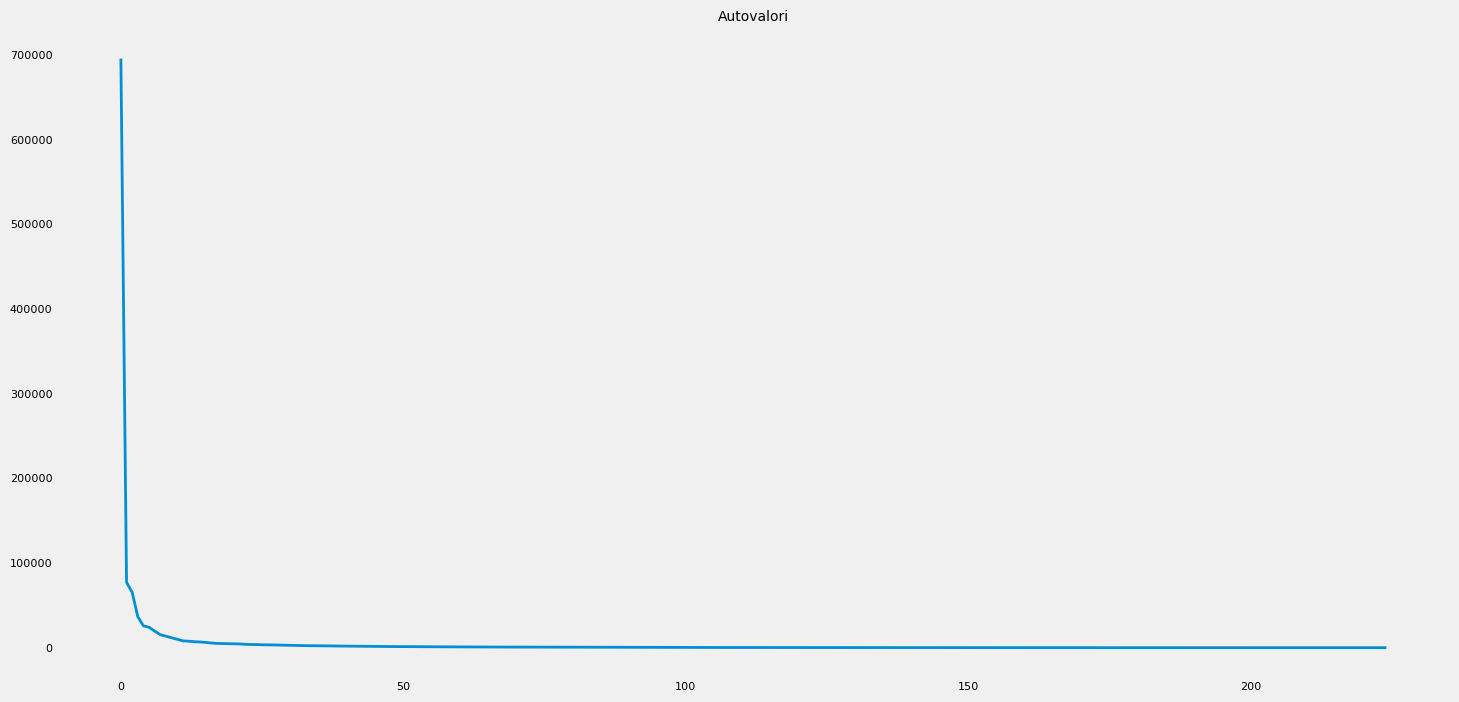

In [ ]:
# Crea una nuova figura per il grafico degli autovalori
fig = plt.figure()
# Aggiunge un sistema di assi alla figura
ax = fig.add_subplot()
# Plotta gli autovalori (val) sull'asse y, l'indice sull'asse x
ax.plot(val)
# Attiva la griglia per facilitare la lettura del grafico
ax.grid()
# Imposta il titolo del grafico
plt.title('Autovalori')
# Visualizza il grafico
plt.show()

Plot delle immagini corrispondenti alla proiezione dell'immagine originale nello spazio generato dai primi $i$ autovettori, proiettata nuovamente nello spazio originale. Il codice permette di osservare come la qualità della ricostruzione dell'immagine varia al variare del numero di componenti principali utilizzati. Con un numero basso di componenti, l'immagine sarà più compressa e meno dettagliata, mentre con un numero maggiore di componenti, la ricostruzione sarà più fedele all'originale. La lista `dist` può essere utilizzata per analizzare quantitativamente l'errore di ricostruzione.

All'inizio, vengono inizializzati due elementi:
- **`i`**: un contatore che tiene traccia del numero di subplot creati.
- **`dist`**: una lista vuota che verrà utilizzata per memorizzare le distanze (norme di Frobenius) tra l'immagine originale e quella ricostruita.

Successivamente, viene creata una figura (`fig`) con dimensioni specificate (`16x12`) per visualizzare le immagini ricostruite. Il colore di sfondo della figura viene impostato su bianco.

### Ciclo sui componenti principali
Il ciclo `for` itera su un insieme di valori che rappresentano il numero di componenti principali (`numpc`) da utilizzare per la ricostruzione delle immagini. I valori includono numeri specifici (ad esempio, 0, 1, 2, ecc.) e intervalli (ad esempio, da 10 a 50 con step di 10), oltre a un valore massimo di 100.

Per ogni valore di `numpc`:
1. **Proiezione nello spazio PCA**: La funzione `pca` viene chiamata per proiettare l'immagine centrata (`bw_c`) nello spazio dei primi `numpc` autovettori. Questa funzione restituisce due valori:
   - `coeff`: i coefficienti dei componenti principali.
   - `score`: le proiezioni dei dati nello spazio ridotto.
2. **Ricostruzione dell'immagine**: L'immagine viene ricostruita nello spazio originale utilizzando il prodotto tra `score` e la trasposta di `coeff`. Successivamente, viene riaggiunta la media originale delle feature per riportare i valori alla scala originale.
3. **Calcolo della distanza**: La distanza tra l'immagine originale (`bw`) e quella ricostruita (`bw_rec`) viene calcolata utilizzando la norma di Frobenius e aggiunta alla lista `dist`.

Per ogni immagine ricostruita:
- Viene creato un subplot nella figura principale utilizzando `subplot(4, 3, i)`, che organizza i grafici in una griglia di 4 righe e 3 colonne.
- Gli assi del grafico vengono "puliti" rimuovendo i tick con `NullLocator`.
- L'immagine ricostruita viene visualizzata con `imshow(bw_rec)` e viene impostata una scala di grigi con `gray()`.
- Un titolo viene aggiunto sopra ogni immagine per indicare il numero di componenti principali utilizzati.



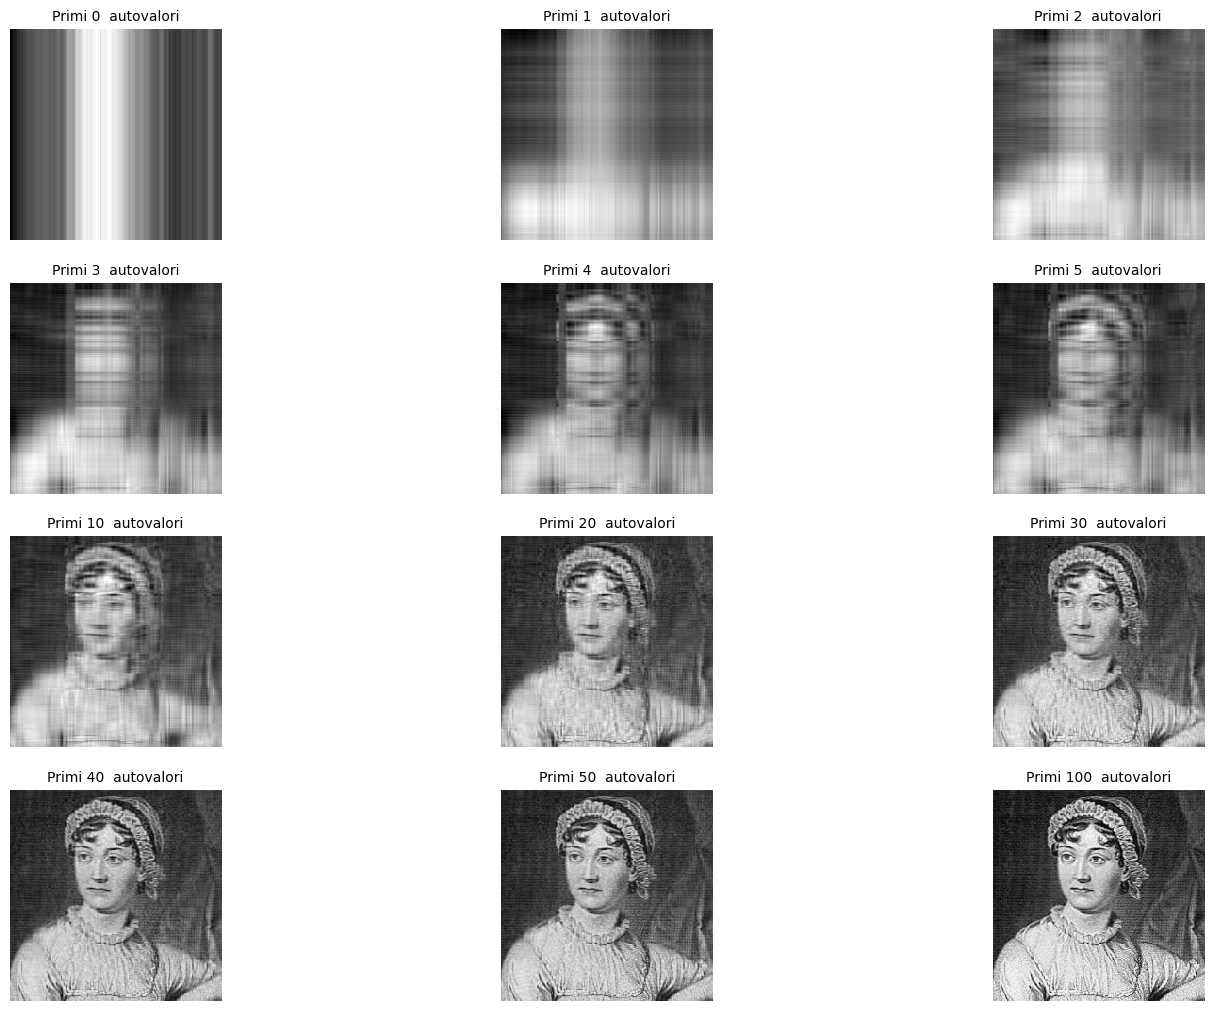

In [17]:
# Inizializza il contatore per i subplot e la lista delle distanze
i = 1
dist = []

# Crea una figura per visualizzare le immagini ricostruite
fig = plt.figure(figsize=(16,12))
fig.patch.set_facecolor('white')

# Cicla su diversi numeri di componenti principali da utilizzare per la ricostruzione
for numpc in [0,1,2,3,4,5]+list(range(10,51,10))+[100]:
    # Proietta l'immagine centrata nello spazio dei primi 'numpc' autovettori
    coeff, score = pca(bw_c, vec, numpc)
    # Ricostruisce l'immagine nello spazio originale
    bw_rec = np.dot(score, coeff.T)
    # Riaggiunge la media delle feature per ottenere i valori originali
    bw_rec = bw_rec + np.mean(bw, axis=0)
    # Calcola la distanza (norma di Frobenius) tra l'immagine originale e quella compressa
    dist.append(linalg.norm(bw - bw_rec, 'fro'))
    # Visualizza l'immagine ricostruita nel subplot corrispondente
    ax = subplot(4, 3, i, frame_on=False)
    ax.xaxis.set_major_locator(NullLocator())  # Rimuove i tick dagli assi
    ax.yaxis.set_major_locator(NullLocator())
    i += 1
    imshow(bw_rec)
    title(f'Primi {numpc}  autovalori')
    gray()

Visualizzazione dell'immagine corrispondente all'utilizzo di tuue le componenti in una finestra grafica.

1. `fig = plt.figure()`: crea una nuova figura, ovvero una finestra o area in cui verranno disegnati i grafici.
2. `fig.patch.set_facecolor('white')`: imposta il colore di sfondo della figura su bianco, migliorando la leggibilità dell’immagine.
3. `ax = fig.gca()`: ottiene l’asse corrente (get current axis) della figura, che permette di manipolare ulteriormente il grafico se necessario.
4. `imshow(bw)`: visualizza l’immagine contenuta nella variabile `bw`. Questa funzione è spesso usata per mostrare immagini in scala di grigi o a colori.
5. `plt.title(f'Tutti gli autovalori ({full_pc}))')`: imposta il titolo della finestra grafica, includendo il valore della variabile `full_pc` per fornire un contesto aggiuntivo.
6. `plt.grid(False)`: disattiva la visualizzazione della griglia sul grafico, rendendo l’immagine più pulita.
7. `plt.show()`: mostra effettivamente la finestra grafica all’utente.

In sintesi, questo codice serve per visualizzare un’immagine (`bw`) con un titolo personalizzato, senza griglia, e con uno sfondo bianco.

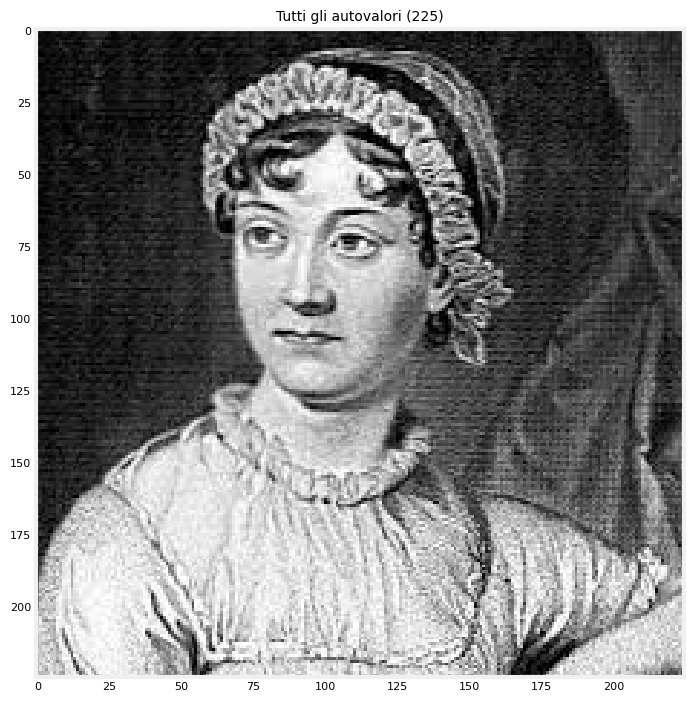

In [18]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow(bw)
plt.title(f'Tutti gli autovalori ({full_pc})')
plt.grid(False)
plt.show()

Differenza tra l'immagine originaria e quelle derivanti dalla compressione, misurata mediante norma di Frobenius, con visualizzazione di un grafico della differenza calcolata.

1. **Creazione della figura**: `fig = plt.figure()` crea una nuova figura su cui verrà disegnato il grafico.
2. **Impostazione del colore di sfondo**: `fig.patch.set_facecolor('white')` imposta il colore di sfondo della figura su bianco, migliorando la leggibilità.
3. **Recupero degli assi**: `ax = fig.add_subplot()` aggiunge un sistema di assi (ax) alla figura, che servirà come area di disegno per il grafico.
4. **Tracciamento della curva**: `ax.plot(dist, c=colors[0])` disegna la curva dei valori contenuti in `dist`, utilizzando il primo colore della lista `colors`. Questo rappresenta visivamente l'andamento della distanza.
5. **Aggiunta della griglia**: `ax.grid()` aggiunge una griglia al grafico, facilitando la lettura dei valori.
6. **Titolo del grafico**: `plt.title('Distanza in termini di norma di  Frobenius')` imposta il titolo del grafico, specificando che si tratta della distanza calcolata tramite la norma di Frobenius.
7. **Visualizzazione**: `plt.show()` mostra effettivamente la finestra del grafico.

La norma di Frobenius è una misura della "distanza" tra matrici, spesso usata nell'analisi dei dati e nell'algebra lineare. Se `dist` rappresenta una sequenza di queste distanze, il grafico aiuta a visualizzarne l'andamento.

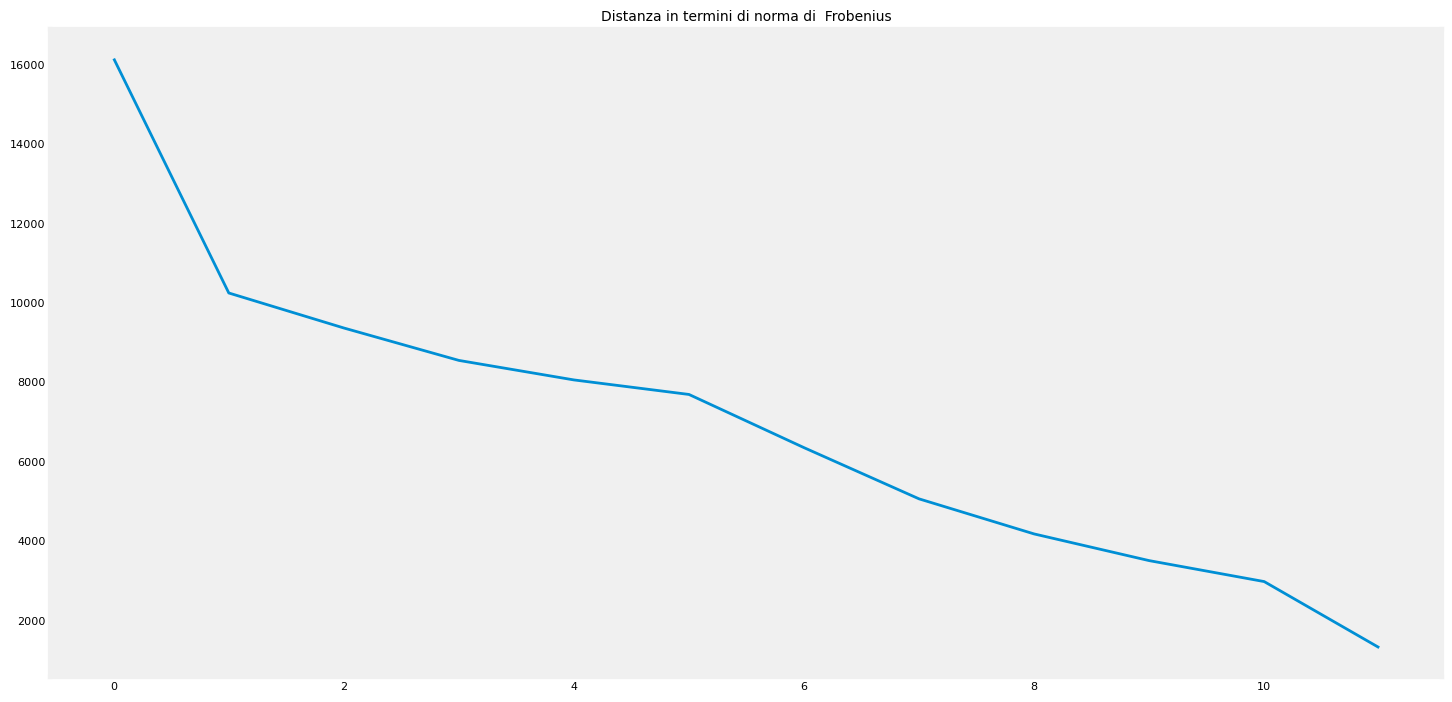

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(dist, c=colors[0])
ax.grid()
plt.title('Distanza in termini di norma di  Frobenius')
plt.show()